<h1> ECE4179 - Lab on linear regression </h1> <br>
<img src="numpy_linear_regression.gif" width="1200" align="center">
Animation of our "model" at each step when training with gradient descent

<b>With our new knowledge of Python and Numpy, lets explore some linear models</b>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h3> Loading the data </h3>
Lets load some "toy" data that we can use

In [3]:
#loading our data
npzfile = np.load("toy_data_two_moon.npz")

#The compressed Numpy file is split up into 4 parts
#Train inputs (x) and target outputs (y)
X_train = npzfile['arr_0']
y_train = npzfile['arr_2']
#Test inputs (x) and target outputs (y)
X_test = npzfile['arr_1']
y_test = npzfile['arr_3']

<h3> Let's plot our data </h3>

Text(0.5, 1.0, 'Test data')

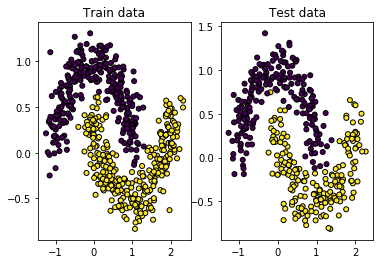

In [4]:
#Lets see what the data looks like
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train[:,0], s=25, edgecolor='k')
plt.title("Train data")
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test[:,0], s=25, edgecolor='k')
plt.title("Test data")

Our data is randomly sampled from an odd looking distribution, the colour of the dots (as represented by y_test[:,0], a one or zero) is what the output of our model SHOULD be (aka the "Ground Truth Data"). Note that each data point is a vector of two values (the "x and y" values), therefore there will only be two parameters in our linear model. <br>
In order to include a bias term let's augment the data by adding a "one" to every input datapoint. This gives us three values for every datapoint, the parameter associated with the constant "one" input is the bias term.

In [5]:
X_train_bias = np.c_[X_train,np.ones([y_train.size,1])]
X_test_bias = np.c_[X_test, np.ones([y_test.size,1])]

<h2> Training a linear regression model in closed form</h2>
We recall that the parameters of a linear regression can be obtained in closed-form. If $\boldsymbol{X} \in \mathbb{R}^{n \times m}$ denotes the matrix of input data (each column is a training sample) and  $\boldsymbol{Y} \in \mathbb{R}^{p \times m}$ is the matrix of desired outputs, then the parameters of the model is obtained as
$\theta = (\boldsymbol{X}\boldsymbol{X}^\top)^{-1}\boldsymbol{X}\boldsymbol{Y}^\top$.

To evaluate our model, we need the following function

In [6]:
#This function takes the model inputs and parameters and returns the outout of the model, rounded to 1 or 0
#AKA we threshold the output to 1 or 0 at 0.5
def predict(X, theta):
    return np.matmul(X.t, theta)#####To Do! create a function that will calculate the output of the model and threshold it!#####

Now we can compute the values of $\theta$ using the closed form solution defined above

In [ ]:
theta_lin = ###To Do! Using the closed-from equation above calculate the values of Theta###
print("The values of Theta are:\n", theta_lin[:,0])

In [ ]:
#cacluate the thresholded outputs of the model
y_test_hat_lin = predict(X_test_bias,theta_lin)
acc_lin = ####To Do! - write some code to caclulate the percentage accuracy of the model##
print("Accuracy of linear model(closed form): %.2f%% " %(acc_lin*100))

Using the models predicted output labels (1/0) lets vislualise the result

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test_hat_lin[:,0], s=25, edgecolor='k')
plt.title("Test data, linear model estimation")

Because our data is 2D we can visualise our model as a line. We need to first transform it from the "general form" of the line equation: <br>
$0 = Ax + By + C$ <br>
To the more familiar form: <br>
$y = mx + C$ <br>
aka:
$y = -\frac{(Ax + C)}{B}$ <br>

In our case:<br>
$0.5 = \theta_0x + \theta_1y + \theta_2$ <br>
$y = -\frac{(\theta_0x + \theta_2 - 0.5)}{\theta_1}$ <br>

Note its 0.5 not 0 in our case due to where we thresholded the output, the line is therefore the "decision boundary" not stictly the line given by our model<br>


In [ ]:
x_values = np.linspace(-2, 2.5, 100)
y_values = ####To Do! Using the equation above calculate the values of y using the theta values#####
plt.plot(x_values, y_values)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test_hat_lin[:,0], s=25, edgecolor='k')

<h2>Training a model with GD </h2>
In doing so, we need a function to <br>
1- compute the loss with respect to the inputs and the parameters of the model <br>
2- compute the gradient of the model with respect to its parameters $\theta$

We recall the loss of the linear regression as
\begin{align}
L(\theta) = \frac{1}{m} \sum_{i=1}^m \|\theta^\top \boldsymbol{x}_i - y_i\|^2
\end{align}

Now it is easy to see that

\begin{align}
\frac{\partial L}{\partial \theta} = \frac{1}{m} \sum_{i=1}^m 2(\theta^\top \boldsymbol{x}_i - y_i)\boldsymbol{x}_i
\end{align}

The function below implements this for us.

In [ ]:
def compute_grad_loss(X, y, theta):
    #this function will get X, a set of samples (each sample is a row in X),
    #the corresponding labels in the array y and the current parameter of the regression model theta
    
    h = ###To Do! Calucluate the RAW ouput of the model###

    loss = ###To Do! Calucluate the loss###
    grad_vec = ###To Do! Calucluate the gradient of the loss with respect to theta##
    return loss, grad_vec

With this, we can perform multiple itteration of GD to train the model

In [ ]:
# theta is the parameters of the linear model
# To learn them, we randomly initilize them below
np.random.seed(85)
theta = ###To Do! randomly initialise the values of theta###
lr = ##To Do! try some different learning rates!##

#number of times we itterate over the dataset (epoch)
max_epoch = ##To Do! try different numbers of epochs, untill your model converges!##

loss = [] #keep track of the loss values
acc = [] #keep track of the accuracy 
for epoch in range(max_epoch):
    y_test_hat = predict(X_test_bias,theta)
    acc.append(##To Do! - write some code to caclulate the percentage accuracy of the model##)

    # call the compute_grad_loss that is implemented above to 
    # measure the loss and the gradient
    tmpLoss, grad_vec = compute_grad_loss(X_train_bias, y_train, theta)
    loss.append(tmpLoss)
    #update the theta parameter according to the GD here
    theta = 
    
print("Accuracy of linear model(GD): %.2f%% " %(acc[-1]*100))
print("The values of Theta are:\n", theta[:,0])

In [ ]:
plt.plot(acc)
plt.title("Model accuracy per itteration")